# **Import Library**

In [1]:
!pip install nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import string
import requests
import re
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Data Gathering**

In [4]:
reviewsTix = pd.read_csv('/content/TIX_ID REVIEWS.csv')

In [5]:
reviewsTix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77487 entries, 0 to 77486
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              77487 non-null  object
 1   userName              77487 non-null  object
 2   userImage             77487 non-null  object
 3   content               77487 non-null  object
 4   score                 77487 non-null  int64 
 5   thumbsUpCount         77487 non-null  int64 
 6   reviewCreatedVersion  69969 non-null  object
 7   at                    77487 non-null  object
 8   replyContent          39350 non-null  object
 9   repliedAt             39350 non-null  object
 10  appVersion            69969 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.5+ MB


In [6]:
reviewsTix.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e0e7abae-25f1-470a-85dc-ffe85bb05fa0,berlian fauziyyah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sebenernya sih udah bagus, tapi sayang belum d...",3,1,3.14.0,2025-04-08 16:32:52,"Hi TIX Hunter, terima kasih atas review & sara...",2025-04-09 02:59:27,3.14.0
1,d6f86acf-0f7a-4c7b-b180-141d810f2b01,Husnul Khotimah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Totally ok, tapi tolong akses untuk memesan ti...",5,26,3.14.0,2025-04-08 04:40:40,"Hi TIX Hunter, untuk jadwal film dan pre-sale ...",2025-04-08 04:56:56,3.14.0
2,0fdb5d6c-9765-4233-85be-287b14331cd3,Alya Syakira,https://play-lh.googleusercontent.com/a-/ALV-U...,"kenapa pas udah tekan ringkasan order, selalu ...",3,4,3.14.0,2025-04-05 06:41:39,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-05 07:13:28,3.14.0
3,07668d3e-cadc-4bec-adb5-7a609118bf8d,Yzrif Prananta,https://play-lh.googleusercontent.com/a-/ALV-U...,"pelayanannya sangat buruk, bahkan untuk fee ti...",1,9,3.14.0,2025-04-04 09:00:40,Hi TIX Hunter. Untuk kendala Anda sebelumnya s...,2025-04-04 09:11:02,3.14.0
4,df815ad0-0587-4341-8abd-75f8b1203ef7,Apasaja,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasisinya sangat jelek setiap aku mau beli...,1,0,3.14.0,2025-04-06 12:35:10,"Hi TIX Hunter, mohon maaf atas ketidaknyamanan...",2025-04-06 13:04:54,3.14.0


In [7]:
#Check Data Missing Value & Null
reviewsTix.isna().sum()

#Hapus Data Missing Value
reviewsTix.dropna(inplace=True)

In [8]:
#Check Duplicate
reviewsTix.duplicated().sum()

np.int64(0)

In [9]:
reviewsTix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34787 entries, 0 to 73919
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              34787 non-null  object
 1   userName              34787 non-null  object
 2   userImage             34787 non-null  object
 3   content               34787 non-null  object
 4   score                 34787 non-null  int64 
 5   thumbsUpCount         34787 non-null  int64 
 6   reviewCreatedVersion  34787 non-null  object
 7   at                    34787 non-null  object
 8   replyContent          34787 non-null  object
 9   repliedAt             34787 non-null  object
 10  appVersion            34787 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [10]:
slangwords = {'aplikasisinya':'aplikasi','udh':'udah','apk':'aplikasi','utk':'untuk','yaa':'ya','yah':'ya','yg':'yang','sebenernya':'sebenarnya','udah':'sudah','pesen':'pesan','totally':'sepenuhnya','via':'lewat',
              'dah':'deh',"gpp": "tidak apa-apa","klian": "kalian", "klo": "kalau","kn": "kan","ok": "ok",'lg':'lagi','lgi':'lagi','ajg':'anjing','anjng':'anjing'}

def slangwordsfix(text):
  words = text.split()
  fixed_words = []

  for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

  fixed_text = ' '.join(fixed_words)
  return fixed_text

In [11]:
reviewsTix.head(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e0e7abae-25f1-470a-85dc-ffe85bb05fa0,berlian fauziyyah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sebenernya sih udah bagus, tapi sayang belum d...",3,1,3.14.0,2025-04-08 16:32:52,"Hi TIX Hunter, terima kasih atas review & sara...",2025-04-09 02:59:27,3.14.0
1,d6f86acf-0f7a-4c7b-b180-141d810f2b01,Husnul Khotimah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Totally ok, tapi tolong akses untuk memesan ti...",5,26,3.14.0,2025-04-08 04:40:40,"Hi TIX Hunter, untuk jadwal film dan pre-sale ...",2025-04-08 04:56:56,3.14.0
2,0fdb5d6c-9765-4233-85be-287b14331cd3,Alya Syakira,https://play-lh.googleusercontent.com/a-/ALV-U...,"kenapa pas udah tekan ringkasan order, selalu ...",3,4,3.14.0,2025-04-05 06:41:39,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-05 07:13:28,3.14.0
3,07668d3e-cadc-4bec-adb5-7a609118bf8d,Yzrif Prananta,https://play-lh.googleusercontent.com/a-/ALV-U...,"pelayanannya sangat buruk, bahkan untuk fee ti...",1,9,3.14.0,2025-04-04 09:00:40,Hi TIX Hunter. Untuk kendala Anda sebelumnya s...,2025-04-04 09:11:02,3.14.0
4,df815ad0-0587-4341-8abd-75f8b1203ef7,Apasaja,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasisinya sangat jelek setiap aku mau beli...,1,0,3.14.0,2025-04-06 12:35:10,"Hi TIX Hunter, mohon maaf atas ketidaknyamanan...",2025-04-06 13:04:54,3.14.0
5,e556f51c-840b-4ebd-81af-31b06f4666ce,Kharisma Yuzhar,https://play-lh.googleusercontent.com/a-/ALV-U...,hari ini pesen tiket via tix id pemesanan gaga...,1,1,3.14.0,2025-04-09 03:23:21,"Hi TIX Hunter, kami mohon maaf atas ketidaknya...",2025-04-09 03:38:52,3.14.0
6,0ec47519-e7ac-42e8-b969-e00bc9dc4d4e,zihan septi,https://play-lh.googleusercontent.com/a-/ALV-U...,refund gagal proses pengembaliannya lama sekal...,1,0,3.14.0,2025-04-09 09:07:22,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-09 10:22:54,3.14.0
7,442ec7da-baa2-4c4e-8d17-5cdc278f6aa7,Hero Putra,https://play-lh.googleusercontent.com/a-/ALV-U...,saya cek jadwal minecraft Di cinemapolis balik...,1,0,3.14.0,2025-04-09 13:24:35,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-10 05:13:52,3.14.0
8,4e5ea2c0-40a6-4575-8a7c-c2c273d8cef3,Silvira Badjri,https://play-lh.googleusercontent.com/a-/ALV-U...,udah bayar udah pesen eh malah di refund dari ...,1,1,3.14.0,2025-04-07 07:35:29,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-07 07:48:24,3.14.0
9,1e3a9d07-45ce-4ab5-940e-f50319f82444,Ira N,https://play-lh.googleusercontent.com/a-/ALV-U...,kalau pas Film nya Baru.. rame penonton nya.. ...,5,152,3.13.0,2025-02-17 07:21:16,"Hi TIX Hunter, terima kasih atas review yang d...",2025-02-17 07:25:20,3.13.0


## **Data Preprocessing**

In [12]:
#Hapus Emoji
def hapus_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticon wajah
        u"\U0001F300-\U0001F5FF"  # simbol & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # bendera
        u"\U00002700-\U000027BF"  # simbol tambahan
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

#CaseFolding
def casefolding(text):
  text = text.lower()
  return text

#Punctuation
def nopunctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

#Lemmatization
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()

    wordlemma = text.split()

    lemmatized_words = [lemmatizer.lemmatize(word) for word in wordlemma]
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

#StopWords
def hapus_stopwords(text):
    # Mengambil daftar stopwords dalam bahasa Indonesia
    eng_stopwords = set(stopwords.words('english'))
    indo_stopwords = set(stopwords.words('indonesian'))

    #Gabungkan 2 stopwords
    all_stopwords = indo_stopwords.union(eng_stopwords)

    # Memisahkan teks menjadi kata-kata
    wordlist = text.split()

    # Menghapus kata-kata yang termasuk dalam daftar stopwords
    kata_tersaring = [word for word in wordlist if word not in all_stopwords]

    # Menggabungkan kembali kata-kata yang telah tersaring menjadi sebuah string
    text = ' '.join(kata_tersaring)
    return text

#Tokenize
def tokenizingText(text):
    text = word_tokenize(text)
    return text

#Join menjadi kalimat
def joinText(text):
    text = ' '.join(text)
    return text

In [13]:
reviewsTix['content_casefolding'] = reviewsTix['content'].apply(casefolding)
reviewsTix['content_emoji'] = reviewsTix['content_casefolding'].apply(hapus_emoji)
reviewsTix['content_slangwords'] = reviewsTix['content_emoji'].apply(slangwordsfix)
reviewsTix['content_nopunctuation'] = reviewsTix['content_slangwords'].apply(nopunctuation)
reviewsTix['content_lemmatization'] = reviewsTix['content_nopunctuation'].apply(lemmatization)
reviewsTix['content_nostopwords'] = reviewsTix['content_lemmatization'].apply(hapus_stopwords)
reviewsTix['content_tokenizer'] = reviewsTix['content_nostopwords'].apply(tokenizingText)
reviewsTix['content_join'] = reviewsTix['content_tokenizer'].apply(joinText)
reviewsTix.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefolding,content_emoji,content_slangwords,content_nopunctuation,content_lemmatization,content_nostopwords,content_tokenizer,content_join
0,e0e7abae-25f1-470a-85dc-ffe85bb05fa0,berlian fauziyyah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sebenernya sih udah bagus, tapi sayang belum d...",3,1,3.14.0,2025-04-08 16:32:52,"Hi TIX Hunter, terima kasih atas review & sara...",2025-04-09 02:59:27,3.14.0,"sebenernya sih udah bagus, tapi sayang belum d...","sebenernya sih udah bagus, tapi sayang belum d...","sebenarnya sih sudah bagus, tapi sayang belum ...",sebenarnya sih sudah bagus tapi sayang belum d...,sebenarnya sih sudah bagus tapi sayang belum d...,sih bagus sayang disabilitas friendly hiburan ...,"[sih, bagus, sayang, disabilitas, friendly, hi...",sih bagus sayang disabilitas friendly hiburan ...
1,d6f86acf-0f7a-4c7b-b180-141d810f2b01,Husnul Khotimah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Totally ok, tapi tolong akses untuk memesan ti...",5,26,3.14.0,2025-04-08 04:40:40,"Hi TIX Hunter, untuk jadwal film dan pre-sale ...",2025-04-08 04:56:56,3.14.0,"totally ok, tapi tolong akses untuk memesan ti...","totally ok, tapi tolong akses untuk memesan ti...","sepenuhnya ok, tapi tolong akses untuk memesan...",sepenuhnya ok tapi tolong akses untuk memesan ...,sepenuhnya ok tapi tolong akses untuk memesan ...,sepenuhnya ok tolong akses memesan tiket next ...,"[sepenuhnya, ok, tolong, akses, memesan, tiket...",sepenuhnya ok tolong akses memesan tiket next ...
2,0fdb5d6c-9765-4233-85be-287b14331cd3,Alya Syakira,https://play-lh.googleusercontent.com/a-/ALV-U...,"kenapa pas udah tekan ringkasan order, selalu ...",3,4,3.14.0,2025-04-05 06:41:39,"Hi TIX Hunter, terima kasih atas review Anda d...",2025-04-05 07:13:28,3.14.0,"kenapa pas udah tekan ringkasan order, selalu ...","kenapa pas udah tekan ringkasan order, selalu ...","kenapa pas sudah tekan ringkasan order, selalu...",kenapa pas sudah tekan ringkasan order selalu ...,kenapa pa sudah tekan ringkasan order selalu l...,pa tekan ringkasan order loading muter2 gak tr...,"[pa, tekan, ringkasan, order, loading, muter2,...",pa tekan ringkasan order loading muter2 gak tr...
3,07668d3e-cadc-4bec-adb5-7a609118bf8d,Yzrif Prananta,https://play-lh.googleusercontent.com/a-/ALV-U...,"pelayanannya sangat buruk, bahkan untuk fee ti...",1,9,3.14.0,2025-04-04 09:00:40,Hi TIX Hunter. Untuk kendala Anda sebelumnya s...,2025-04-04 09:11:02,3.14.0,"pelayanannya sangat buruk, bahkan untuk fee ti...","pelayanannya sangat buruk, bahkan untuk fee ti...","pelayanannya sangat buruk, bahkan untuk fee ti...",pelayanannya sangat buruk bahkan untuk fee tik...,pelayanannya sangat buruk bahkan untuk fee tik...,pelayanannya buruk fee tiket harga 4 ribu pert...,"[pelayanannya, buruk, fee, tiket, harga, 4, ri...",pelayanannya buruk fee tiket harga 4 ribu pert...
4,df815ad0-0587-4341-8abd-75f8b1203ef7,Apasaja,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasisinya sangat jelek setiap aku mau beli...,1,0,3.14.0,2025-04-06 12:35:10,"Hi TIX Hunter, mohon maaf atas ketidaknyamanan...",2025-04-06 13:04:54,3.14.0,aplikasisinya sangat jelek setiap aku mau beli...,aplikasisinya sangat jelek setiap aku mau beli...,aplikasi sangat jelek setiap aku mau beli tike...,aplikasi sangat jelek setiap aku mau beli tike...,aplikasi sangat jelek setiap aku mau beli tike...,aplikasi jelek beli tiket gak ganti hp aja kal...,"[aplikasi, jelek, beli, tiket, gak, ganti, hp,...",aplikasi jelek beli tiket gak ganti hp aja kal...


In [14]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [15]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
results = reviewsTix['content_tokenizer'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
reviewsTix['polarity_score'] = results[0]
reviewsTix['polarity'] = results[1]
print(reviewsTix['polarity'].value_counts())

polarity
positive    27635
negative     7152
Name: count, dtype: int64


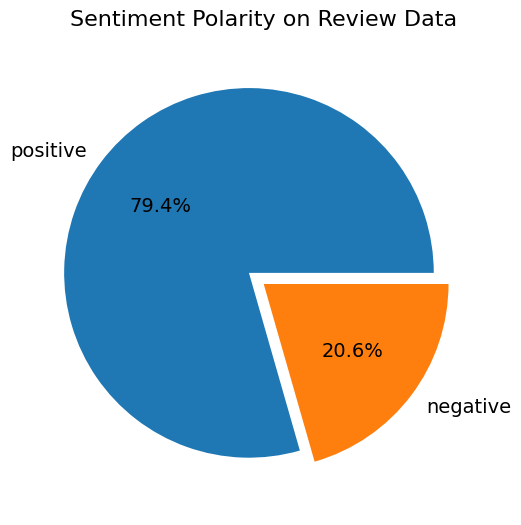

In [17]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in reviewsTix['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(reviewsTix['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [18]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = reviewsTix[reviewsTix['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['content_join','polarity_score', 'polarity','content_tokenizer']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [19]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = reviewsTix[reviewsTix['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['content_join','polarity_score', 'polarity','content_tokenizer']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

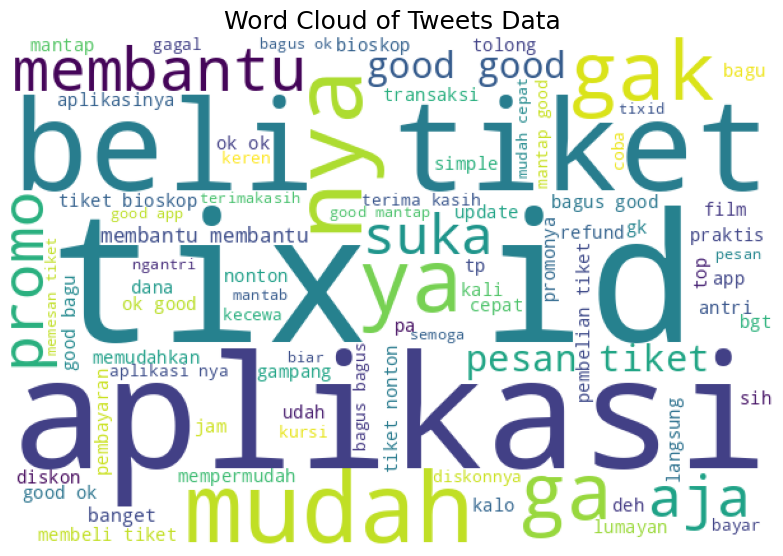

In [20]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in reviewsTix['content_tokenizer']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

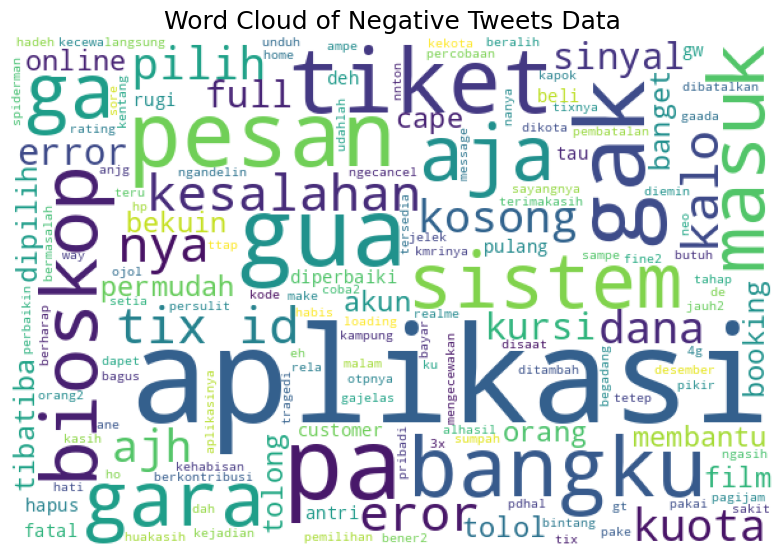

In [21]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['content_tokenizer']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

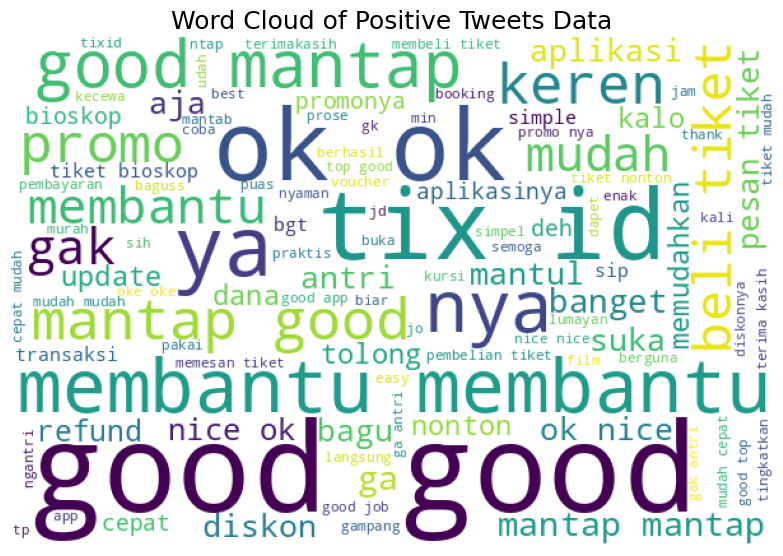

In [22]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['content_tokenizer']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

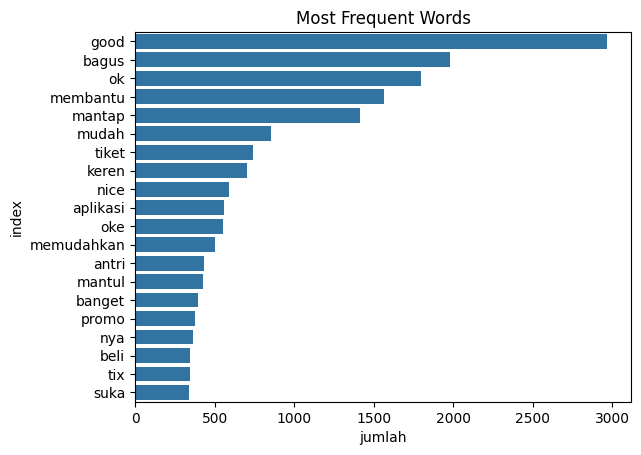

In [23]:
# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviewsTix['content_join'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [24]:
x = reviewsTix['content_join']
y = reviewsTix['polarity']

In [25]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(x)

In [26]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,50,admin,aja,akun,aman,antri,aplikasi,aplikasinya,app,apps,...,tp,tpi,transaksi,trus,uang,udah,update,voucher,xxi,ya
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.201093,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.173031
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.294817,0.000000,0.0,0.0,...,0.0,0.0,0.441342,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.169883,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.597689,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.372883,0.0,0.0,0.0,0.291043,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34782,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
34783,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
34784,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.286965
34785,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


# **Pengujian Pertama dengan 70:30**

In [27]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.982053388090349
Decision Tree - accuracy_test: 0.9155887707195555


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.982053388090349
Random Forest - accuracy_test: 0.9310146593848807


# **Pengujian kedua dengan 80:20**

In [30]:
# Bagi data menjadi data latih dan data uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train2.toarray(), y_train2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train2.toarray())
y_pred_test_dt = decision_tree.predict(X_test2.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train2)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test2)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9812785224046857
Decision Tree - accuracy_test: 0.9190859442368496


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train2.toarray(), y_train2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train2.toarray())
y_pred_test_rf = random_forest.predict(X_test2.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train2)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test2)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9812785224046857
Random Forest - accuracy_test: 0.9305835010060363


In [33]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train2.toarray(), y_train2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train2.toarray())
y_pred_test_lr = logistic_regression.predict(X_test2.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train2)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test2)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.944374573286859
Logistic Regression - accuracy_test: 0.938488071284852


In [34]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_casefolded = casefolding(kalimat_baru)
kalimat_baru_emoji = hapus_emoji(kalimat_baru_casefolded)
kalimat_baru_slangfixed = slangwordsfix(kalimat_baru_emoji)
kalimat_baru_nopunctuation = nopunctuation(kalimat_baru_slangfixed)
kalimat_baru_lemmatized = lemmatization(kalimat_baru_nopunctuation)
kalimat_baru_nostopwords = hapus_stopwords(kalimat_baru_lemmatized)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_nostopwords)
kalimat_baru_final = joinText(kalimat_baru_tokenized)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = random_forest.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: aplikasinya bagus banget, suka deh
Sentimen kalimat baru adalah POSITIF.


# **Kesimpulan**

Setelah dilakukan 2 percobaan dengan perbandingan **70:30** dan **80:20** pada 2 model yang sama yaitu **random forest dan decision tree**, akurasi menunjukkan bahwa pada data testing model random forest lebih unggul dibandingkan decision tree, begitu pula dengan data train akurasi random_forest jauh lebih tinggi dibandingkan logistic regression, sehingga model random_forest akan digunakan sebagai model utama dalam analisis sentiment